## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('train.csv')

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [75]:
df.shape

(404290, 6)

In [76]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [77]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [78]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [79]:
value_counts = df['is_duplicate'].value_counts()

# Calculate percentages
percentages = value_counts / value_counts.sum() * 100


print(percentages)

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


0: 255027 (63.08%)
1: 149263 (36.92%)


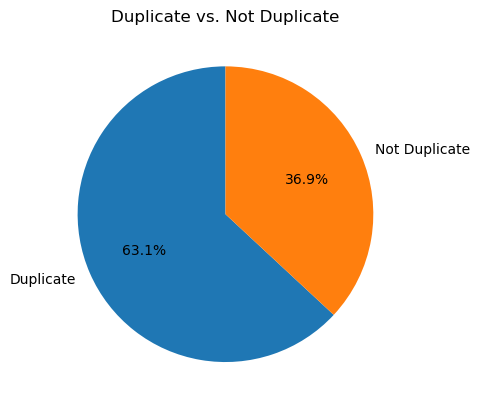

In [80]:
import matplotlib.pyplot as plt

# Print value counts and percentages
for value, count, percentage in zip(value_counts.index, value_counts.values, percentages.values):
    print(f"{value}: {count} ({percentage:.2f}%)")

# Create a pie chart
labels = ['Duplicate', 'Not Duplicate']
counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Duplicate vs. Not Duplicate')
plt.show()

In [81]:
# Assuming 'df' is your DataFrame
df = df.dropna()

# Verify if null values have been dropped
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

# Splitting the entire dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.4, random_state=42)

### Exploration

In [83]:
train_df.shape

(242572, 6)

In [84]:
val_df.shape

(161715, 6)

In [85]:
train_df['is_duplicate'].value_counts()

0    153018
1     89554
Name: is_duplicate, dtype: int64

In [86]:
value_counts = df['is_duplicate'].value_counts()

# Calculate percentages
percentages = value_counts / value_counts.sum() * 100


print(percentages)

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


In [87]:
value_counts = val_df['is_duplicate'].value_counts()

# Calculate percentages
percentages = value_counts / value_counts.sum() * 100


print(percentages)

0    63.077637
1    36.922363
Name: is_duplicate, dtype: float64


### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [88]:
#Remove punctuation
import string 

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text



In [89]:
train_df['question1_clean'] = train_df['question1'].apply(lambda x: remove_punct(x))

train_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,question1_clean
316518,316518,320279,174834,How should I ask this girl out?,How do I ask a girl to date me ?,1,How should I ask this girl out
328264,328264,203911,115259,What is the best decision you' ve ever made?,"What has been the best decision of your life, ...",1,What is the best decision you ve ever made
148708,148708,234405,234406,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkw...,1,Why do you drive on a parkway and park in a dr...


In [90]:
train_df['question2_clean'] = train_df['question2'].apply(lambda x: remove_punct(x))

train_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,question1_clean,question2_clean
316518,316518,320279,174834,How should I ask this girl out?,How do I ask a girl to date me ?,1,How should I ask this girl out,How do I ask a girl to date me
328264,328264,203911,115259,What is the best decision you' ve ever made?,"What has been the best decision of your life, ...",1,What is the best decision you ve ever made,What has been the best decision of your life p...
148708,148708,234405,234406,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkw...,1,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkways


In [91]:
import re

def tokenize(text):
    tokens = text.split()
    return tokens

train_df['q1_tokenized'] = train_df['question1_clean'].apply(lambda x: tokenize(x.lower()))

train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_clean,question2_clean,q1_tokenized
316518,316518,320279,174834,How should I ask this girl out?,How do I ask a girl to date me ?,1,How should I ask this girl out,How do I ask a girl to date me,"[how, should, i, ask, this, girl, out]"
328264,328264,203911,115259,What is the best decision you' ve ever made?,"What has been the best decision of your life, ...",1,What is the best decision you ve ever made,What has been the best decision of your life p...,"[what, is, the, best, decision, you, ve, ever,..."
148708,148708,234405,234406,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkw...,1,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkways,"[why, do, you, drive, on, a, parkway, and, par..."
177040,177040,272250,272251,What is the difference between an MBA and and ...,What's the difference between a master's in ma...,1,What is the difference between an MBA and and ...,Whats the difference between a masters in mana...,"[what, is, the, difference, between, an, mba, ..."
185455,185455,283115,283116,"When will we get to see One Piece, Naruto, Dea...",Where can I buy the complete series of anime N...,0,When will we get to see One Piece Naruto Death...,Where can I buy the complete series of anime N...,"[when, will, we, get, to, see, one, piece, nar..."


In [92]:
train_df['q2_tokenized'] = train_df['question2_clean'].apply(lambda x: tokenize(x.lower()))

train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_clean,question2_clean,q1_tokenized,q2_tokenized
316518,316518,320279,174834,How should I ask this girl out?,How do I ask a girl to date me ?,1,How should I ask this girl out,How do I ask a girl to date me,"[how, should, i, ask, this, girl, out]","[how, do, i, ask, a, girl, to, date, me]"
328264,328264,203911,115259,What is the best decision you' ve ever made?,"What has been the best decision of your life, ...",1,What is the best decision you ve ever made,What has been the best decision of your life p...,"[what, is, the, best, decision, you, ve, ever,...","[what, has, been, the, best, decision, of, you..."
148708,148708,234405,234406,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkw...,1,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkways,"[why, do, you, drive, on, a, parkway, and, par...","[why, do, we, park, on, driveways, and, drive,..."
177040,177040,272250,272251,What is the difference between an MBA and and ...,What's the difference between a master's in ma...,1,What is the difference between an MBA and and ...,Whats the difference between a masters in mana...,"[what, is, the, difference, between, an, mba, ...","[whats, the, difference, between, a, masters, ..."
185455,185455,283115,283116,"When will we get to see One Piece, Naruto, Dea...",Where can I buy the complete series of anime N...,0,When will we get to see One Piece Naruto Death...,Where can I buy the complete series of anime N...,"[when, will, we, get, to, see, one, piece, nar...","[where, can, i, buy, the, complete, series, of..."


In [41]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [93]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# view the stopwords
stopwords.words()

[nltk_data] Downloading package stopwords to /Users/ckz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [94]:
ENGstopwords = stopwords.words('english')
ENGstopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [95]:
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in ENGstopwords]
    return text

train_df['q1_nostop'] = train_df['q1_tokenized'].apply(lambda x: remove_stopwords(x))

train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_clean,question2_clean,q1_tokenized,q2_tokenized,q1_nostop
316518,316518,320279,174834,How should I ask this girl out?,How do I ask a girl to date me ?,1,How should I ask this girl out,How do I ask a girl to date me,"[how, should, i, ask, this, girl, out]","[how, do, i, ask, a, girl, to, date, me]","[ask, girl]"
328264,328264,203911,115259,What is the best decision you' ve ever made?,"What has been the best decision of your life, ...",1,What is the best decision you ve ever made,What has been the best decision of your life p...,"[what, is, the, best, decision, you, ve, ever,...","[what, has, been, the, best, decision, of, you...","[best, decision, ever, made]"
148708,148708,234405,234406,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkw...,1,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkways,"[why, do, you, drive, on, a, parkway, and, par...","[why, do, we, park, on, driveways, and, drive,...","[drive, parkway, park, driveway]"
177040,177040,272250,272251,What is the difference between an MBA and and ...,What's the difference between a master's in ma...,1,What is the difference between an MBA and and ...,Whats the difference between a masters in mana...,"[what, is, the, difference, between, an, mba, ...","[whats, the, difference, between, a, masters, ...","[difference, mba, masters, management]"
185455,185455,283115,283116,"When will we get to see One Piece, Naruto, Dea...",Where can I buy the complete series of anime N...,0,When will we get to see One Piece Naruto Death...,Where can I buy the complete series of anime N...,"[when, will, we, get, to, see, one, piece, nar...","[where, can, i, buy, the, complete, series, of...","[get, see, one, piece, naruto, death, note, ma..."


In [96]:
train_df['q2_nostop'] = train_df['q2_tokenized'].apply(lambda x: remove_stopwords(x))

In [97]:
nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /Users/ckz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
train_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'question1_clean', 'question2_clean', 'q1_tokenized', 'q2_tokenized',
       'q1_nostop', 'q2_nostop'],
      dtype='object')

In [99]:
stemmer = PorterStemmer()

# Apply stemming to q1_nostop column
train_df['q1_stemmed'] = train_df['q1_nostop'].apply(lambda x: [stemmer.stem(word) for word in x])

# Apply stemming to q2_nostop column
train_df['q2_stemmed'] = train_df['q2_nostop'].apply(lambda x: [stemmer.stem(word) for word in x])

In [100]:
train_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,question1_clean,question2_clean,q1_tokenized,q2_tokenized,q1_nostop,q2_nostop,q1_stemmed,q2_stemmed
316518,316518,320279,174834,How should I ask this girl out?,How do I ask a girl to date me ?,1,How should I ask this girl out,How do I ask a girl to date me,"[how, should, i, ask, this, girl, out]","[how, do, i, ask, a, girl, to, date, me]","[ask, girl]","[ask, girl, date]","[ask, girl]","[ask, girl, date]"
328264,328264,203911,115259,What is the best decision you' ve ever made?,"What has been the best decision of your life, ...",1,What is the best decision you ve ever made,What has been the best decision of your life p...,"[what, is, the, best, decision, you, ve, ever,...","[what, has, been, the, best, decision, of, you...","[best, decision, ever, made]","[best, decision, life, personally, professiona...","[best, decis, ever, made]","[best, decis, life, person, profession]"
148708,148708,234405,234406,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkw...,1,Why do you drive on a parkway and park in a dr...,Why do we park on driveways and drive on parkways,"[why, do, you, drive, on, a, parkway, and, par...","[why, do, we, park, on, driveways, and, drive,...","[drive, parkway, park, driveway]","[park, driveways, drive, parkways]","[drive, parkway, park, driveway]","[park, driveway, drive, parkway]"
177040,177040,272250,272251,What is the difference between an MBA and and ...,What's the difference between a master's in ma...,1,What is the difference between an MBA and and ...,Whats the difference between a masters in mana...,"[what, is, the, difference, between, an, mba, ...","[whats, the, difference, between, a, masters, ...","[difference, mba, masters, management]","[whats, difference, masters, management, mba]","[differ, mba, master, manag]","[what, differ, master, manag, mba]"
185455,185455,283115,283116,"When will we get to see One Piece, Naruto, Dea...",Where can I buy the complete series of anime N...,0,When will we get to see One Piece Naruto Death...,Where can I buy the complete series of anime N...,"[when, will, we, get, to, see, one, piece, nar...","[where, can, i, buy, the, complete, series, of...","[get, see, one, piece, naruto, death, note, ma...","[buy, complete, series, anime, naruto, naruto,...","[get, see, one, piec, naruto, death, note, man...","[buy, complet, seri, anim, naruto, naruto, shi..."
209380,209380,114959,313653,"What does the phrase ""I'm rooting for you"" mean?","""I'm not gay but my boyfriend is."" What does t...",0,What does the phrase Im rooting for you mean,Im not gay but my boyfriend is What does this ...,"[what, does, the, phrase, im, rooting, for, yo...","[im, not, gay, but, my, boyfriend, is, what, d...","[phrase, im, rooting, mean]","[im, gay, boyfriend, phrase, mean]","[phrase, im, root, mean]","[im, gay, boyfriend, phrase, mean]"
396476,396476,529545,127582,What are the benefits of doing an MBA after ge...,What are the benefits of doing an MBA after ge...,0,What are the benefits of doing an MBA after ge...,What are the benefits of doing an MBA after ge...,"[what, are, the, benefits, of, doing, an, mba,...","[what, are, the, benefits, of, doing, an, mba,...","[benefits, mba, getting, undergraduate, degree...","[benefits, mba, getting, undergraduate, degree...","[benefit, mba, get, undergradu, degre, ministri]","[benefit, mba, get, undergradu, degre, sociolog]"
98127,98127,163118,153432,What is it like to be an Asian in Switzerland?,"When people say ""Asian"", does it include Indians?",0,What is it like to be an Asian in Switzerland,When people say Asian does it include Indians,"[what, is, it, like, to, be, an, asian, in, sw...","[when, people, say, asian, does, it, include, ...","[like, asian, switzerland]","[people, say, asian, include, indians]","[like, asian, switzerland]","[peopl, say, asian, includ, indian]"
201671,201671,30982,303725,Will parents of US citizens get a US citizenship?,What are t

In [101]:
train_df['q1_clean'] = train_df['q1_stemmed'].apply(lambda tokens: ' '.join(tokens))
train_df['q2_clean'] = train_df['q2_stemmed'].apply(lambda tokens: ' '.join(tokens))

In [102]:
df_train = train_df[['q1_clean','q2_clean','q1_stemmed','q2_stemmed','is_duplicate']] #Create new dataframe 

In [103]:
df_train.head()

,q1_clean,q2_clean,q1_stemmed,q2_stemmed,is_duplicate
316518,ask girl,ask girl date,"[ask, girl]","[ask, girl, date]",1
328264,best decis ever made,best decis life person profession,"[best, decis, ever, made]","[best, decis, life, person, profession]",1
148708,drive parkway park driveway,park driveway drive parkway,"[drive, parkway, park, driveway]","[park, driveway, drive, parkway]",1
177040,differ mba master manag,what differ master manag mba,"[differ, mba, master, manag]","[what, differ, master, manag, mba]",1
185455,get see one piec naruto death note mani awesom...,buy complet seri anim naruto naruto shippuden ...,"[get, see, one, piec, naruto, death, note, man...","[buy, complet, seri, anim, naruto, naruto, shi...",0


### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [104]:
from sklearn.feature_extraction.text import CountVectorizer #for BoW
vect = CountVectorizer()

# Convenience function
# This function will apply a vectorizer to a series of text
# Will return a dataframe with the results of the vectorizer.
def create_doc_term_matrix(text,vectorizer):
    doc_term_matrix = vectorizer.fit_transform(text)
    return pd.DataFrame(doc_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())


In [105]:
vectorizer_input = df_train['q1_clean']
vectorizer_input

316518                                             ask girl
328264                                 best decis ever made
148708                          drive parkway park driveway
177040                              differ mba master manag
185455    get see one piec naruto death note mani awesom...
                                ...                        
259180                                    power posit think
365841          thing new employe know go first day tennant
131933                         current win presidenti elect
146868         telugutamilhindi movi lead actor becom mafia
121959             rank cut rohtak medic colleg state quota
Name: q1_clean, Length: 242572, dtype: object

In [106]:
vectorizer_input2 = df_train['q2_clean']
vectorizer_input2

316518                                        ask girl date
328264                    best decis life person profession
148708                          park driveway drive parkway
177040                         what differ master manag mba
185455    buy complet seri anim naruto naruto shippuden ...
                                ...                        
259180                             cultiv power posit think
365841              thing new employe know go first day att
131933      bias asid point time think win presidenti elect
146868    fix internet connect avail problem mobil conne...
121959               regist du state quota neet cutoff 2016
Name: q2_clean, Length: 242572, dtype: object

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
# Fit a basic TFIDF Vectorizer and view the results
tfidf_vect = TfidfVectorizer(use_idf=True, max_features=1000)
X_tfidf = tfidf_vect.fit_transform(vectorizer_input)
type(X_tfidf)

scipy.sparse._csr.csr_matrix

In [ ]:
## Tried a few different number of feature to see if computer can handle. 1000 was the
## number of feature that worked 10,000 crashed kernal, Also reduced the sample size of training model

In [109]:
# Fit a basic TFIDF Vectorizer and view the results

X_tfidf2 = tfidf_vect.fit_transform(vectorizer_input2)
type(X_tfidf2)

scipy.sparse._csr.csr_matrix

In [110]:
X_tfidf.shape

(242572, 1000)

In [111]:
X_tfidf2.shape

(242572, 1000)

In [112]:
df_train.shape

(242572, 5)

In [113]:
# create pandas DataFrame from tfidf_vectorizer_data
tfidf_q1 = pd.DataFrame(X_tfidf.toarray())
tfidf_q2 = pd.DataFrame(X_tfidf2.toarray())

In [114]:
tfidf_q1.shape

(242572, 1000)

In [115]:
tfidf_q2.shape

(242572, 1000)

In [116]:
# Create a feature that counts the number of words for q1 and q2
df_train['q1_words'] = df_train['q1_clean'].apply(lambda x: len(x.split()))
df_train['q2_words'] = df_train['q2_clean'].apply(lambda x: len(x.split()))

/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_73254/3038254509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['q1_words'] = df_train['q1_clean'].apply(lambda x: len(x.split()))
/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_73254/3038254509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['q2_words'] = df_train['q2_clean'].apply(lambda x: len(x.split()))


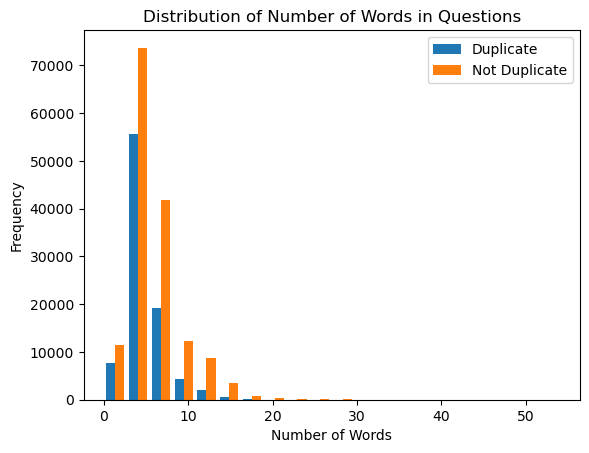

In [117]:
import matplotlib.pyplot as plt

# Separate the data into duplicate and non-duplicate cases
duplicate_words = df_train[df_train['is_duplicate'] == 1]['q1_words']
non_duplicate_words = df_train[df_train['is_duplicate'] == 0]['q1_words']

# Create a histogram plot
plt.hist([duplicate_words, non_duplicate_words], bins=20, label=['Duplicate', 'Not Duplicate'])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Questions')
plt.legend()
plt.show()

In [118]:
df_train.head()

,q1_clean,q2_clean,q1_stemmed,q2_stemmed,is_duplicate,q1_words,q2_words
316518,ask girl,ask girl date,"[ask, girl]","[ask, girl, date]",1,2,3
328264,best decis ever made,best decis life person profession,"[best, decis, ever, made]","[best, decis, life, person, profession]",1,4,5
148708,drive parkway park driveway,park driveway drive parkway,"[drive, parkway, park, driveway]","[park, driveway, drive, parkway]",1,4,4
177040,differ mba master manag,what differ master manag mba,"[differ, mba, master, manag]","[what, differ, master, manag, mba]",1,4,5
185455,get see one piec naruto death note mani awesom...,buy complet seri anim naruto naruto shippuden ...,"[get, see, one, piec, naruto, death, note, man...","[buy, complet, seri, anim, naruto, naruto, shi...",0,12,13


In [119]:
#Create a feature that counts how many similar words there are between q1 and q2

def calculate_word_intersection(q1, q2):
    set1 = set(q1.split())
    set2 = set(q2.split())
    return len(set1.intersection(set2))

df_train['q_1_2_similar'] = df_train.apply(lambda row: calculate_word_intersection(row['q1_clean'], row['q2_clean']), axis=1)

/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_73254/525513437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['q_1_2_similar'] = df_train.apply(lambda row: calculate_word_intersection(row['q1_clean'], row['q2_clean']), axis=1)


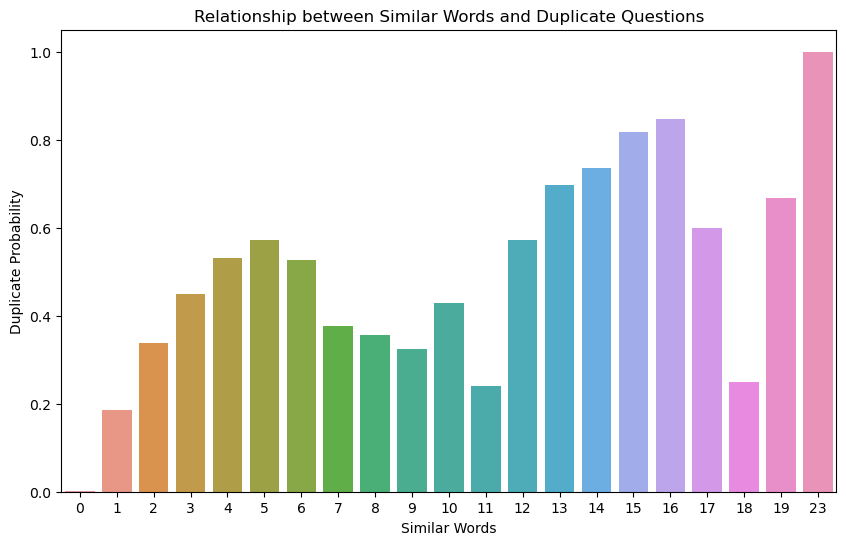

In [120]:
import seaborn as sns

# Group the data by "q_1_2_similar" and calculate the mean of "is_duplicate"
similar_duplicate_means = df_train.groupby('q_1_2_similar')['is_duplicate'].mean()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=similar_duplicate_means.index, y=similar_duplicate_means.values)
plt.xlabel('Similar Words')
plt.ylabel('Duplicate Probability')
plt.title('Relationship between Similar Words and Duplicate Questions')
plt.show()

In [121]:
df_train.head(20)

,q1_clean,q2_clean,q1_stemmed,q2_stemmed,is_duplicate,q1_words,q2_words,q_1_2_similar
316518,ask girl,ask girl date,"[ask, girl]","[ask, girl, date]",1,2,3,2
328264,best decis ever made,best decis life person profession,"[best, decis, ever, made]","[best, decis, life, person, profession]",1,4,5,2
148708,drive parkway park driveway,park driveway drive parkway,"[drive, parkway, park, driveway]","[park, driveway, drive, parkway]",1,4,4,4
177040,differ mba master manag,what differ master manag mba,"[differ, mba, master, manag]","[what, differ, master, manag, mba]",1,4,5,4
185455,get see one piec naruto death note mani awesom...,buy complet seri anim naruto naruto shippuden ...,"[get, see, one, piec, naruto, death, note, man...","[buy, complet, seri, anim, naruto, naruto, shi...",0,12,13,5
209380,phrase im root mean,im gay boyfriend phrase mean,"[phrase, im, root, mean]","[im, gay, boyfriend, phrase, mean]",0,4,5,3
396476,benefit mba get undergradu degre ministri,benefit mba get undergradu degre sociolog,"[benefit, mba, get, undergradu, degre, ministri]","[benefit, mba, get, undergradu, degre, sociolog]",0,6,6,5
98127,like asian switzerland,peopl say asian includ indian,"[like, asian, switzerland]","[peopl, say, asian, includ, indian]",0,3,5,1
201671,parent us citizen get us citizenship,top 10 way get us citizenship,"[parent, us, citizen, get, us, citizenship]","[top, 10, way, get, us, citizenship]",0,6,6,3
2427,tip hack find cheap flight,hack book cheap flight ticket,"[tip, hack, find, cheap, flight]","[hack, book, cheap, flight, ticket]",1,5,5,3


In [122]:
#Create a new feature that tells if the last word is the same
def compare_last_words(row):
    q1_words = row['q1_clean'].split()
    q2_words = row['q2_clean'].split()
    
    if len(q1_words) > 0 and len(q2_words) > 0:
        return q1_words[-1] == q2_words[-1]
    else:
        return False

df_train['last_word_same'] = df_train.apply(compare_last_words, axis=1).astype(int)


/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_73254/4177547968.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['last_word_same'] = df_train.apply(compare_last_words, axis=1).astype(int)


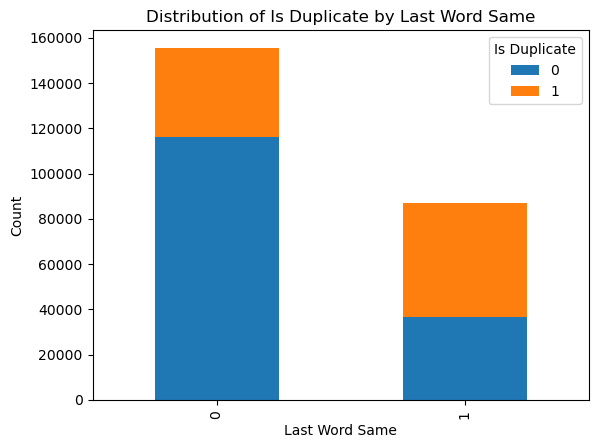

In [123]:

# Count the occurrences of each combination of "last_word_same" and "is_duplicate"
cross_tab = pd.crosstab(df_train['last_word_same'], df_train['is_duplicate'])

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Last Word Same')
plt.ylabel('Count')
plt.title('Distribution of Is Duplicate by Last Word Same')

# Show the legend
plt.legend(title='Is Duplicate')

# Display the plot
plt.show()

In [124]:
df_train.columns

Index(['q1_clean', 'q2_clean', 'q1_stemmed', 'q2_stemmed', 'is_duplicate',
       'q1_words', 'q2_words', 'q_1_2_similar', 'last_word_same'],
      dtype='object')

In [125]:
# Create a word overlap percentage feature
df_train['word_overlap_percentage'] = df_train['q_1_2_similar'] / (df_train['q1_words'] + df_train['q2_words']) * 100

/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_73254/2465529195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['word_overlap_percentage'] = df_train['q_1_2_similar'] / (df_train['q1_words'] + df_train['q2_words']) * 100


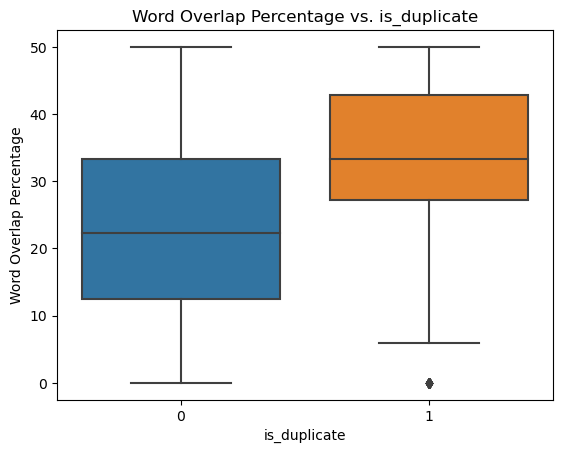

In [126]:

# Create a box plot or violin plot
sns.boxplot(x='is_duplicate', y='word_overlap_percentage', data=df_train)
plt.xlabel('is_duplicate')
plt.ylabel('Word Overlap Percentage')
plt.title('Word Overlap Percentage vs. is_duplicate')
plt.show()

In [127]:
df_train.isnull().sum()

q1_clean                    0
q2_clean                    0
q1_stemmed                  0
q2_stemmed                  0
is_duplicate                0
q1_words                    0
q2_words                    0
q_1_2_similar               0
last_word_same              0
word_overlap_percentage    13
dtype: int64

In [128]:
mode_overlap_percentage = df_train['word_overlap_percentage'].mode().iloc[0]
df_train['word_overlap_percentage'].fillna(mode_overlap_percentage, inplace=True)

/var/folders/j1/j5f5974x3sj1crjx533p6k9h0000gn/T/ipykernel_73254/3165973568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['word_overlap_percentage'].fillna(mode_overlap_percentage, inplace=True)


In [129]:
df_train.isnull().sum()

q1_clean                   0
q2_clean                   0
q1_stemmed                 0
q2_stemmed                 0
is_duplicate               0
q1_words                   0
q2_words                   0
q_1_2_similar              0
last_word_same             0
word_overlap_percentage    0
dtype: int64

In [65]:
df_train.shape

(242572, 10)

In [ ]:
## Test a logistic regression model with only the tfidfs of q1 and q2, and numerical df_train features

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np 

# Combine all the dataframes to train the model and test on target variable
X = np.concatenate((tfidf_q1, tfidf_q2, df_train[['q1_words', 'q2_words', 'q_1_2_similar','last_word_same','word_overlap_percentage']].values), axis=1)
y = df_train['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7588786973101103
Precision: 0.6933103787506149
Recall: 0.6269320582675414
F1-score: 0.6584525547445255


In [51]:
## Use Smote to re-train the model with balanced data
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7444501700504998
Precision: 0.6249664549601932
Recall: 0.7768820193483821
F1-Score: 0.692692841562562


In [131]:
#Add a word2vec feature to the model

import gensim
from gensim.models import Word2Vec

q1_clean = df_train['q1_clean'].tolist()
q2_clean = df_train['q2_clean'].tolist()

concatenated_text = q1_clean + q2_clean

sentences = [sentence.split() for sentence in concatenated_text]

In [132]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [133]:
def compute_word2vec_feature(question, model):
    words = question.split()
    feature = np.zeros(model.vector_size)
    count = 0
    for word in words:
        if word in model.wv.index_to_key:
            feature += model.wv[word]
            count += 1
    if count != 0:
        feature /= count
    return feature

In [134]:
q1_word2vec = [compute_word2vec_feature(question, model) for question in q1_clean]
q2_word2vec = [compute_word2vec_feature(question, model) for question in q2_clean]

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [141]:
## TEST THE MODEL WITH only the numerical df_train features

# Combine all the dataframes to train the model and test on target variable
X = df_train[['q1_words', 'q2_words', 'q_1_2_similar','last_word_same','word_overlap_percentage']]
y = df_train['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6900133979181696
Precision: 0.5993795103527348
Recall: 0.49410652729901033
F1-score: 0.5416755554201078


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Combine all the dataframes to train the model and test on the target variable
X = np.concatenate((tfidf_q1, tfidf_q2, df_train[['q1_words', 'q2_words', 'q_1_2_similar','last_word_same','word_overlap_percentage']].values, q1_word2vec, q2_word2vec), axis=1)
y = df_train['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7586931876739152
Precision: 0.6966242875931609
Recall: 0.6184254420104526
F1-score: 0.6551998350661208


In [143]:
import xgboost as xgb


# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7666907142120993
Precision: 0.7056319782863488
Recall: 0.6359946625152897
F1-score: 0.669006053162558


In [ ]:
'''import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your DataFrame (df_train) and preprocess the text data

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['q1_stemmed'])

# Convert text to sequences
q1_sequences = tokenizer.texts_to_sequences(df_train['q1_stemmed'])
q2_sequences = tokenizer.texts_to_sequences(df_train['q2_stemmed'])

# Pad sequences
sequence_length = 15  # Set the desired sequence length
q1_padded_sequences = pad_sequences(q1_sequences, maxlen=sequence_length, padding='post', truncating='post')
q2_padded_sequences = pad_sequences(q2_sequences, maxlen=sequence_length, padding='post', truncating='post')

# Prepare the target variable
y = df_train['is_duplicate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(q1_padded_sequences, q2_padded_sequences, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=sequence_length))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).flatten()
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)'''